# Progetto: Pioggia in Australia

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Studente Conti Davide
`davide.conti6@studio.unibo.it`

## Obiettivo
- L'obiettivo di questo progetto è quello di allenare un modello di classificazione binaria che predica se domani pioverà o meno in Australia

## Setup Librerie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reperimento dei Dati

- La pagina web che contiene tutte le informazioni riguardo a questo progetto è la seguente: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

- Su questa pagina web è anche possibile scaricare il dataset

In [2]:
data = pd.read_csv("weatherAUS.csv")

- Vediamo il numero di righe e colonne

In [3]:
data.shape

(142193, 24)

- Di default pandas visualizza al massimo 20 colonne (prime 10 e ultime 10). Per poter visualizzare tutte e 24 le colonne usiamo il seguente comando che aumenta tale limite

In [4]:
pd.options.display.max_columns = 24

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Significato delle Colonne

- **`Date`**: indica la data dell'osservazione
- **`Location`**: indica il nome comune della posizione della stazione meteo
- **`MinTemp`**: indica la minima temperatura raggiunta in gradi centigradi
- **`MaxTemp`**: indica la massima temperatura raggiunta in gradi centigradi
- **`Rainfall`**: indica la quantità di pioggia registrata in mm
- **`Evaporation`**: indica la cosiddetta evaporazione della vaschetta di classe A (mm) nelle 24 ore alle 9:00
- **`Sunshine`**: indica il numero di ore di sole splendente nel corso della giornata
- **`WindGustDir`**: indica la direzione della raffica di vento più forte nelle 24 ore
- **`WindGustSpeed`**: indica la velocità (km/h) della raffica di vento più forte nelle 24 ore
- **`WindDir9am`**: indica la direzione del vento alle 9:00
- **`WindDir3pm`**: indica la direzione del vento alle 15:00
- **`WindSpeed9am`**: indica la velocità del vento (km/h) calcolata in media su 10 minuti prima delle 9:00
- **`WindSpeed3pm`**: indica la velocità del vento (km/h) calcolata in media su 10 minuti prima delle 15:00
- **`Humidity9am`**: indica la percentuale di umidità alle 9:00
- **`Humidity3pm`**: indica la percentuale di umidità alle 15:00
- **`Pressure9am`**: indica la pressione atmosferica (hpa) ridotta a livello medio del mare alle 9:00
- **`Pressure3pm`**: indica la pressione atmosferica (hpa) ridotta a livello medio del mare alle 15:00
- **`Cloud9am`**: indica la frazione di cielo oscurato dalle nuvole alle 9:00. Questo è misurato in "oktas", che sono un'unità di ottanta. Registra quanti ottanta del cielo sono oscurati dalle nuvole. Una misura 0 indica cielo completamente chiaro mentre un 8 indica che è completamente coperto
- **`Cloud3pm`**: indica la frazione di cielo oscurato dalle nuvole alle 15:00. Questo è misurato in "oktas", che sono un'unità di ottanta. Registra quanti ottanta del cielo sono oscurati dalle nuvole. Una misura 0 indica cielo completamente chiaro mentre un 8 indica che è completamente coperto
- **`Temp9am`**: indica la temperatura in gradi centigradi alle 9:00
- **`Temp3pm`**: indica la temperatura in gradi centigradi alle 15:00
- **`RainToday`**: indica un valore booleano: 1 se la precipitazione (mm) fino alle 9:00 supera 1mm, altrimenti 0
- **`RISK_MM`**: indica l'ammontare di acqua in mm del giorno dopo. Utilizzata per creare una variabile di risposta alla variabile 'RainTomorrow'. Una sorta di misura del "rischio".
- **`RainTomorrow`**: indica il target da predire. Pioverà domani?

## Preprocessamento di Base

- Analizziamo i tipi delle colonne assegnati da pandas e la memoria occupata dal DataFrame

In [6]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

- Si può osservare che molte colonne sono di tipo **object**.
- Per ridurre la memoria occupata conviene:
    - convertire la seguente colonna dal tipo **object** al tipo **date**: `Date`.
    - convertire le seguenti colonne dal tipo **object** al tipo **category**: `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `RainTomorrow`.

In [7]:
indexFromObjectToCategory = (1, 7, 9, 10, 21, 23)

In [8]:
data = pd.read_csv("weatherAUS.csv", dtype={x: "category" for x in indexFromObjectToCategory}, parse_dates=["Date"])

- Dato che la variabile `Date` indica la data dell'osservazione ha senso impostarla come **indice** del DataFrame

In [9]:
data.set_index("Date", inplace=True)

In [10]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 23 columns):
Location         142193 non-null category
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null category
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null category
WindDir3pm       138415 non-null category
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null category
RISK_MM    

In [11]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


## Analisi Esplorativa

- Analizziamo la distribuzione dei valori nelle varie colonne
- Iniziamo dalla variabile `RainTomorrow` che vogliamo predire
- Col metodo `value_counts` possiamo ottenere sia il conteggio che (con `normalize=True`) la percentuale di valori

In [12]:
data["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
data["RainTomorrow"].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

- Visualizziamo la stessa informazione in un grafico a torta

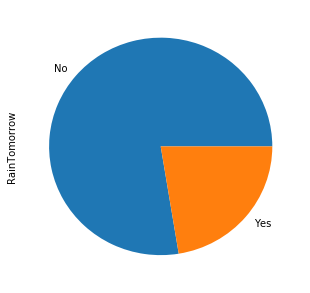

In [14]:
data["RainTomorrow"].value_counts().sort_index().plot.pie(labels=["No", "Yes"], figsize=(5, 5))

- Per comodità creo una funzione generale per grafici come questo

In [15]:
def pieplot(x, **options):
    x.value_counts().sort_index().plot.pie(**options)

- Vediamo la distribuzione per gli altri attributi categorici

In [16]:
data["Location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [17]:
data["Location"].value_counts(normalize=True)

Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Ballarat            0.021295
Launceston          0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.021070
Woomera             0.021028
Cobar               0.021014
Cairns              0.021014
Wollongong          0.020979
GoldCoast           0.020957
WaggaWagga          0.020929
Penrith             0.020845
NorfolkIsland       0.020845
SalmonGums          0.020782
Newcastle           0.020782
CoffsHarbour  

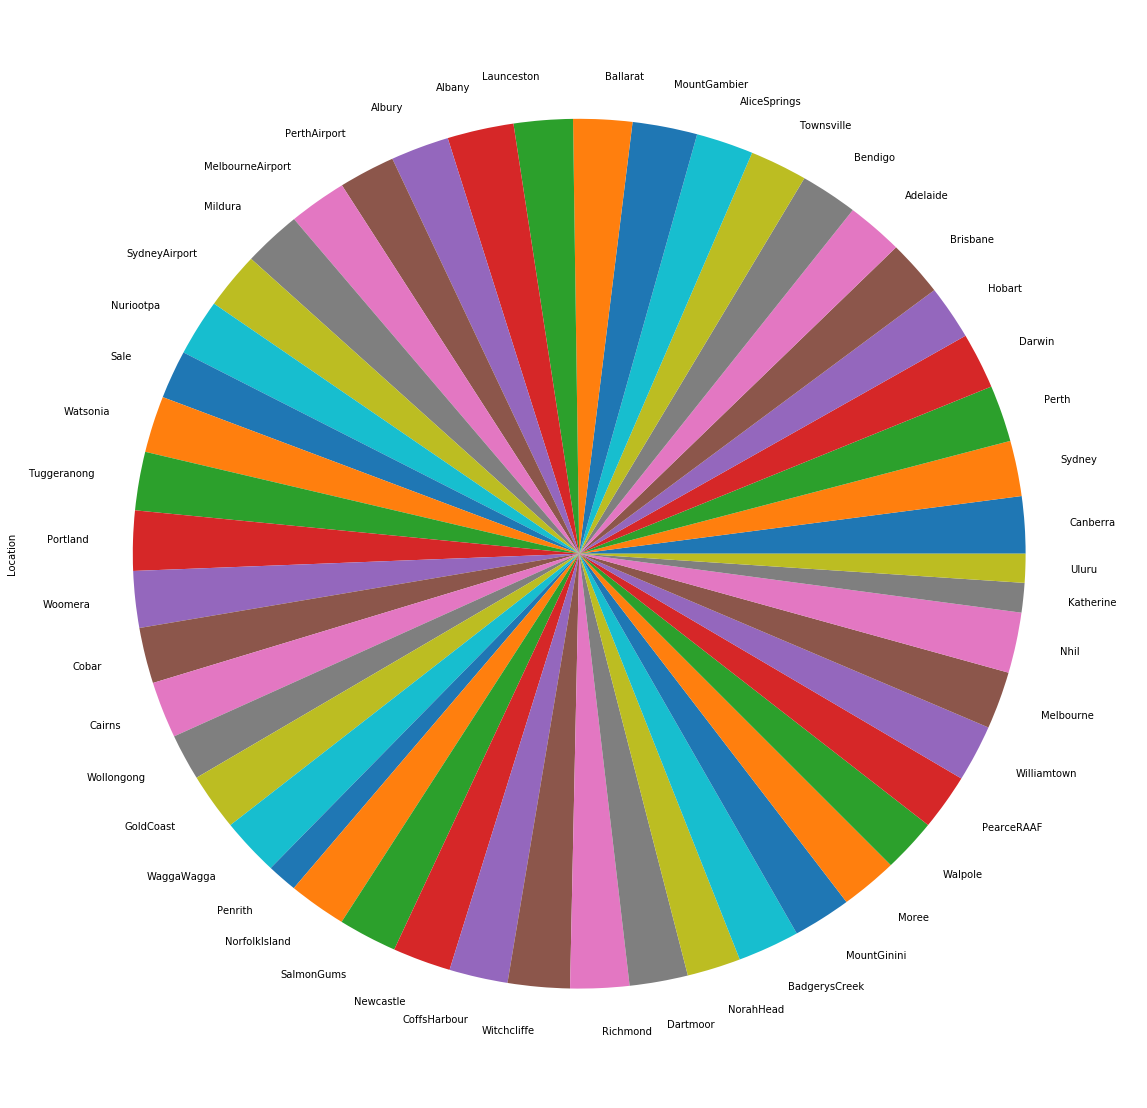

In [18]:
pieplot(data["Location"], labels=data["Location"].value_counts().index, figsize=(20, 20))

In [19]:
data["WindGustDir"].value_counts()

W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64

In [20]:
data["WindGustDir"].value_counts(normalize=True)

W      0.073610
SE     0.070065
E      0.068273
N      0.067987
SSE    0.067686
S      0.067355
WSW    0.066994
SW     0.066211
SSW    0.064804
WNW    0.060709
NW     0.060235
ENE    0.060152
ESE    0.054981
NE     0.053137
NNW    0.049382
NNE    0.048418
Name: WindGustDir, dtype: float64

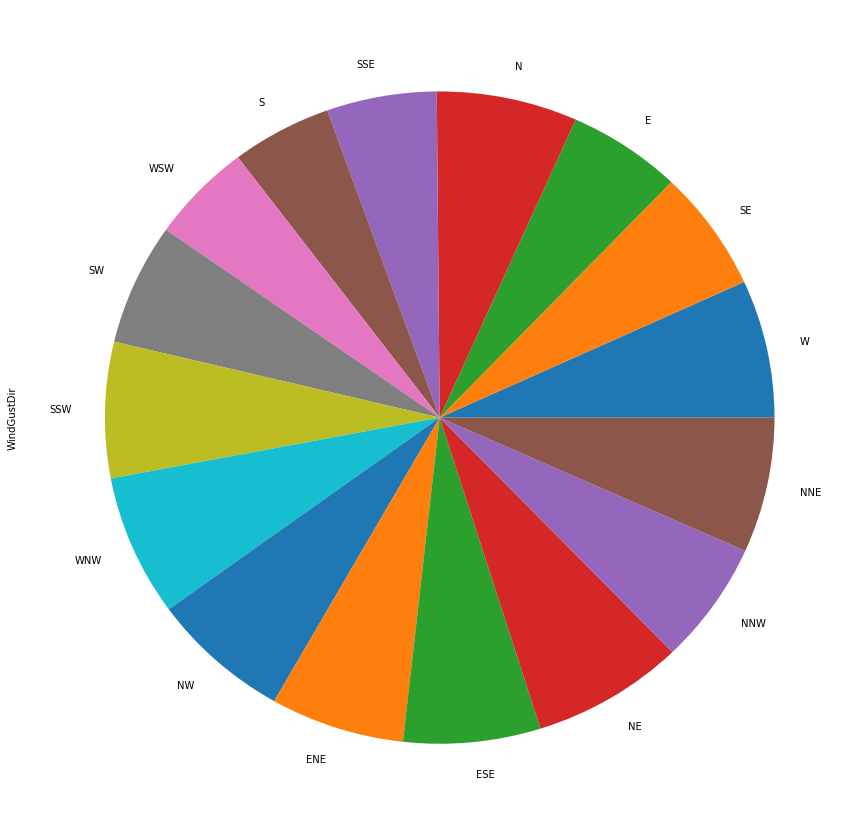

In [21]:
pieplot(data["WindGustDir"], labels=data["WindGustDir"].value_counts().index, figsize=(15, 15))

In [22]:
data["WindDir9am"].value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [23]:
data["WindDir9am"].value_counts(normalize=True)

N      0.086193
SE     0.069315
E      0.068271
SSE    0.067832
NW     0.064700
S      0.064253
W      0.062491
SW     0.062317
NNE    0.060130
NNW    0.059313
ENE    0.058519
ESE    0.057180
NE     0.056945
SSW    0.056347
WNW    0.054426
WSW    0.051770
Name: WindDir9am, dtype: float64

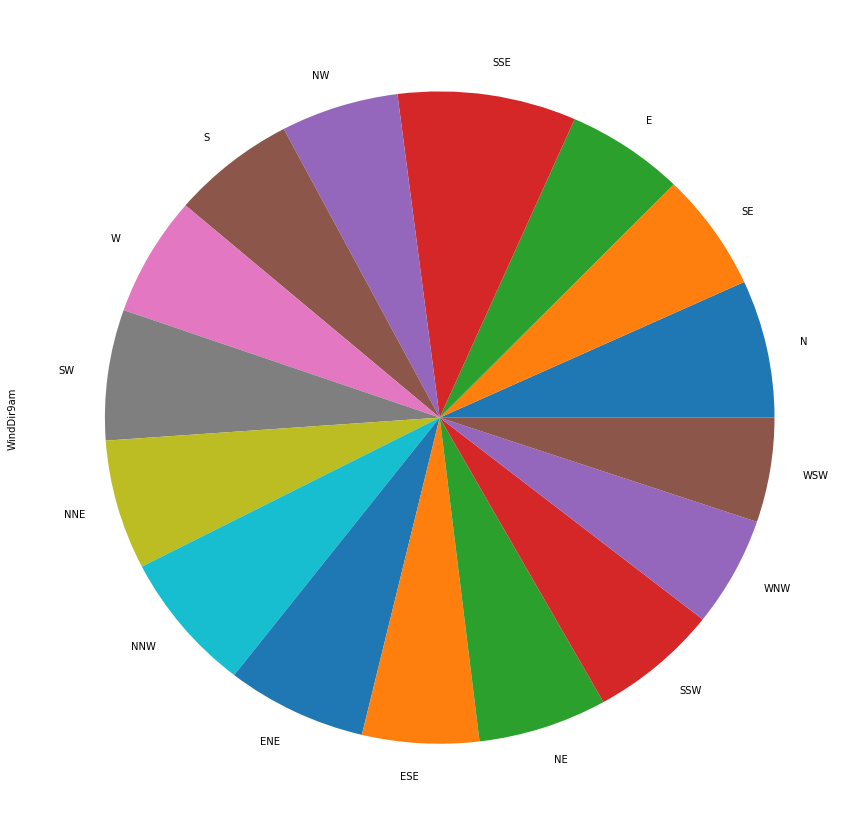

In [24]:
pieplot(data["WindDir9am"], labels=data["WindDir9am"].value_counts().index, figsize=(15, 15))

In [25]:
data["WindDir3pm"].value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [26]:
data["WindDir3pm"].value_counts(normalize=True)

SE     0.077036
W      0.071604
S      0.069342
WSW    0.067399
SW     0.066337
SSE    0.066048
N      0.062616
WNW    0.062537
NW     0.061178
ESE    0.060557
E      0.060268
NE     0.058982
SSW    0.057869
NNW    0.055868
ENE    0.055803
NNE    0.046556
Name: WindDir3pm, dtype: float64

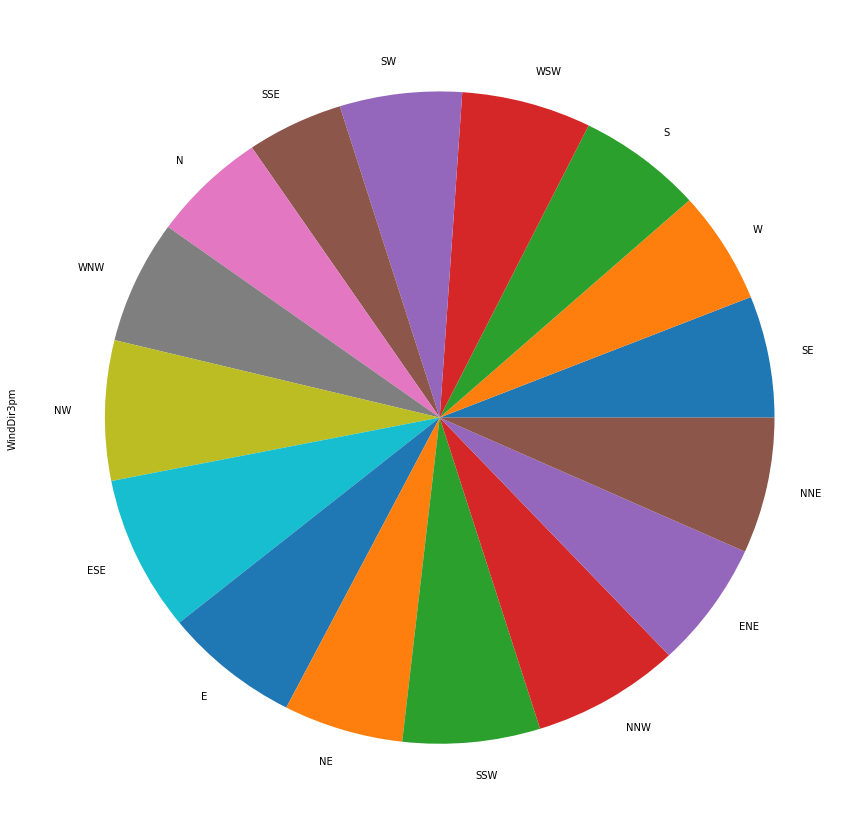

In [27]:
pieplot(data["WindDir3pm"], labels=data["WindDir3pm"].value_counts().index, figsize=(15, 15))

In [28]:
data["RainToday"].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [29]:
data["RainToday"].value_counts(normalize=True)

No     0.776577
Yes    0.223423
Name: RainToday, dtype: float64

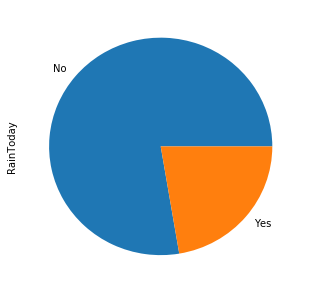

In [30]:
pieplot(data["RainToday"], labels=["No", "Yes"], figsize=(5, 5))

- Analizziamo ora le variabili numeriche

In [31]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


- Visualizziamo ora le distribuzioni delle variabili numeriche tramite istogrammi

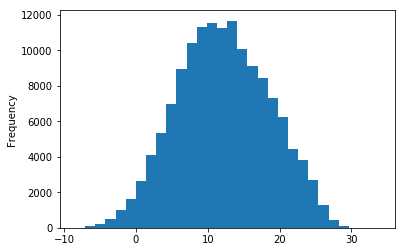

In [32]:
data["MinTemp"].plot.hist(bins=30)

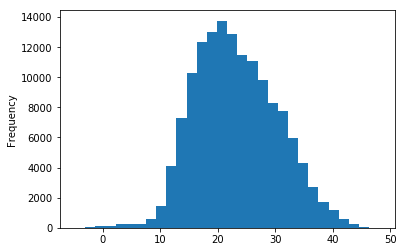

In [33]:
data["MaxTemp"].plot.hist(bins=30)

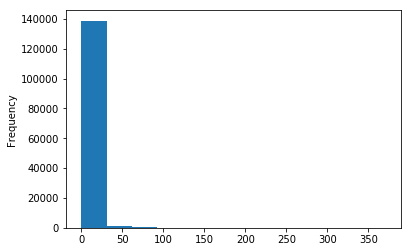

In [34]:
data["Rainfall"].plot.hist(bins=12)

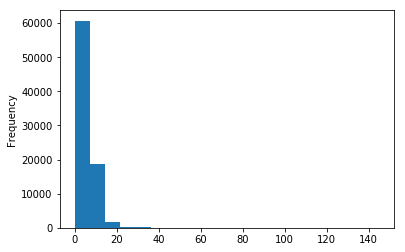

In [35]:
data["Evaporation"].plot.hist(bins=20)

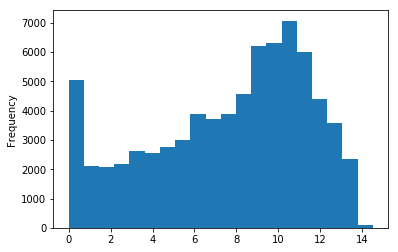

In [36]:
data["Sunshine"].plot.hist(bins=20)

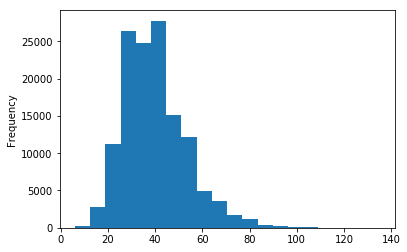

In [37]:
data["WindGustSpeed"].plot.hist(bins=20)

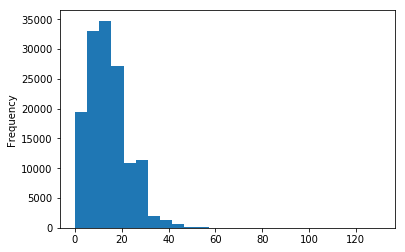

In [38]:
data["WindSpeed9am"].plot.hist(bins=25)

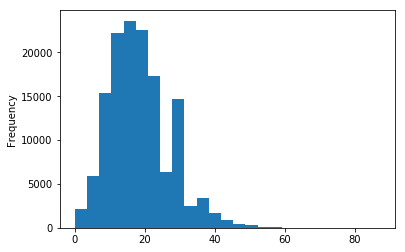

In [39]:
data["WindSpeed3pm"].plot.hist(bins=25)

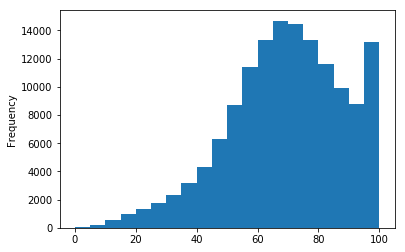

In [40]:
data["Humidity9am"].plot.hist(bins=20)

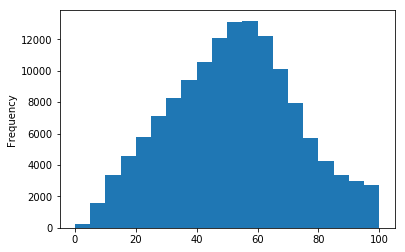

In [41]:
data["Humidity3pm"].plot.hist(bins=20)

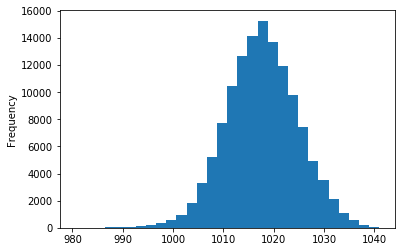

In [42]:
data["Pressure9am"].plot.hist(bins=30)

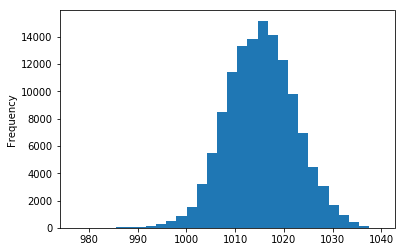

In [43]:
data["Pressure3pm"].plot.hist(bins=30)

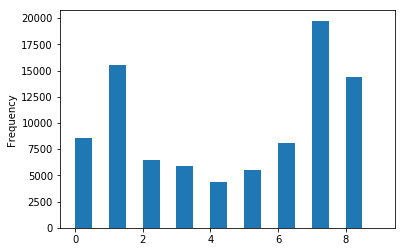

In [44]:
data["Cloud9am"].plot.hist(bins=18)

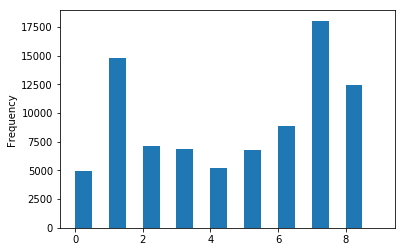

In [45]:
data["Cloud3pm"].plot.hist(bins=18)

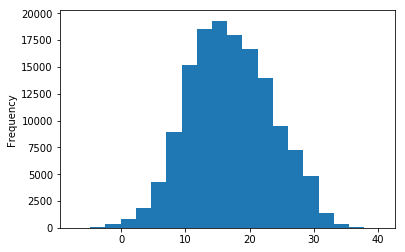

In [46]:
data["Temp9am"].plot.hist(bins=20)

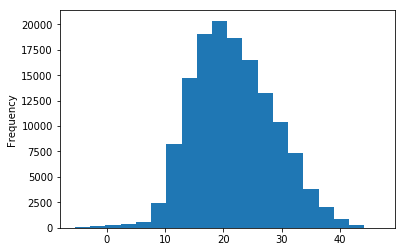

In [47]:
data["Temp3pm"].plot.hist(bins=20)

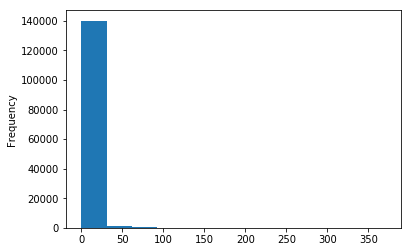

In [48]:
data["RISK_MM"].plot.hist(bins=12)

- Verifichiamo la presenza di dati mancanti

In [49]:
data["Location"].isnull().sum()

0

In [50]:
data["MinTemp"].isnull().sum()

637

In [51]:
data["MaxTemp"].isnull().sum()

322

In [52]:
data["Rainfall"].isnull().sum()

1406

In [53]:
data["Evaporation"].isnull().sum()

60843

In [54]:
data["Sunshine"].isnull().sum()

67816

In [55]:
data["WindGustDir"].isnull().sum()

9330

In [56]:
data["WindGustSpeed"].isnull().sum()

9270

In [57]:
data["WindDir9am"].isnull().sum()

10013

In [58]:
data["WindDir3pm"].isnull().sum()

3778

In [59]:
data["WindSpeed9am"].isnull().sum()

1348

In [60]:
data["WindSpeed3pm"].isnull().sum()

2630

In [61]:
data["Humidity9am"].isnull().sum()

1774

In [62]:
data["Humidity3pm"].isnull().sum()

3610

In [63]:
data["Pressure9am"].isnull().sum()

14014

In [64]:
data["Pressure3pm"].isnull().sum()

13981

In [65]:
data["Cloud9am"].isnull().sum()

53657

In [66]:
data["Cloud3pm"].isnull().sum()

57094

In [67]:
data["Temp9am"].isnull().sum()

904

In [68]:
data["Temp3pm"].isnull().sum()

2726

In [69]:
data["RainToday"].isnull().sum()

1406

In [70]:
data["RISK_MM"].isnull().sum()

0

In [71]:
data["RainTomorrow"].isnull().sum()

0

- Dato che le colonne `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` hanno molti dati mancati le rimuoviamo. Inoltre rimuoviamo anche la colonna `RISK_MM` perchè sulla pagina kaggle viene detto che per ottenere una maggiore predicibilità è opportuno rimuoverla

In [72]:
data.drop(columns=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "RISK_MM"], inplace=True)

- Sostituiamo tuti i valori mancanti delle colonne categoriche `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` con la loro rispettiva **moda**

In [73]:
data["WindGustDir"][data["WindGustDir"].isnull()] = data["WindGustDir"].mode().iloc[0]
data["WindDir9am"][data["WindDir9am"].isnull()] = data["WindDir9am"].mode().iloc[0]
data["WindDir3pm"][data["WindDir3pm"].isnull()] = data["WindDir3pm"].mode().iloc[0]
data["RainToday"][data["RainToday"].isnull()] = data["RainToday"].mode().iloc[0]

- Sostituiamo tutti i valori mancanti delle colonne numeriche `MinTemp,` `MaxTemp`, `Rainfall`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Temp9am`, `Temp3pm` con la loro rispettiva **media**

In [74]:
data.fillna(data.mean(), inplace=True)

- I nuovi valori e i nuovi grafici per le colonne `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, `MinTemp,` `MaxTemp`, `Rainfall`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Temp9am`, `Temp3pm` sono i seguenti

In [75]:
data["WindGustDir"].value_counts()

W      19110
SE      9309
E       9071
N       9033
SSE     8993
S       8949
WSW     8901
SW      8797
SSW     8610
WNW     8066
NW      8003
ENE     7992
ESE     7305
NE      7060
NNW     6561
NNE     6433
Name: WindGustDir, dtype: int64

In [76]:
data["WindGustDir"].value_counts(normalize=True)

W      0.134395
SE     0.065467
E      0.063794
N      0.063526
SSE    0.063245
S      0.062936
WSW    0.062598
SW     0.061867
SSW    0.060552
WNW    0.056726
NW     0.056283
ENE    0.056205
ESE    0.051374
NE     0.049651
NNW    0.046142
NNE    0.045241
Name: WindGustDir, dtype: float64

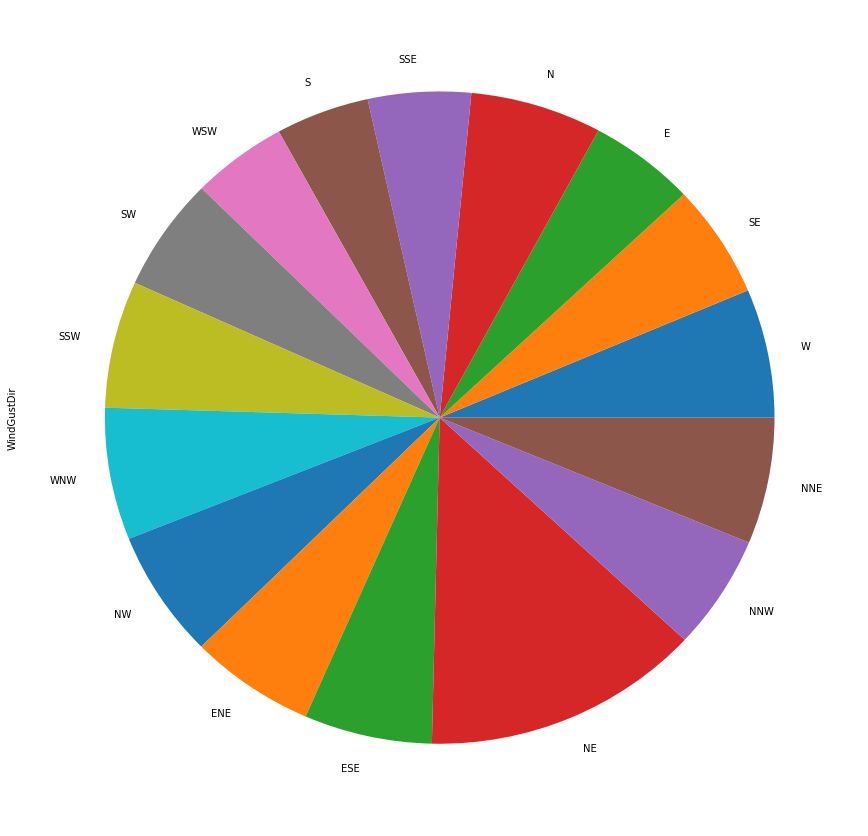

In [77]:
pieplot(data["WindGustDir"], labels=data["WindGustDir"].value_counts().index, figsize=(15, 15))

In [78]:
data["WindDir9am"].value_counts()

N      21406
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [79]:
data["WindDir9am"].value_counts(normalize=True)

N      0.150542
SE     0.064434
E      0.063463
SSE    0.063055
NW     0.060144
S      0.059729
W      0.058090
SW     0.057928
NNE    0.055896
NNW    0.055136
ENE    0.054398
ESE    0.053153
NE     0.052935
SSW    0.052380
WNW    0.050593
WSW    0.048125
Name: WindDir9am, dtype: float64

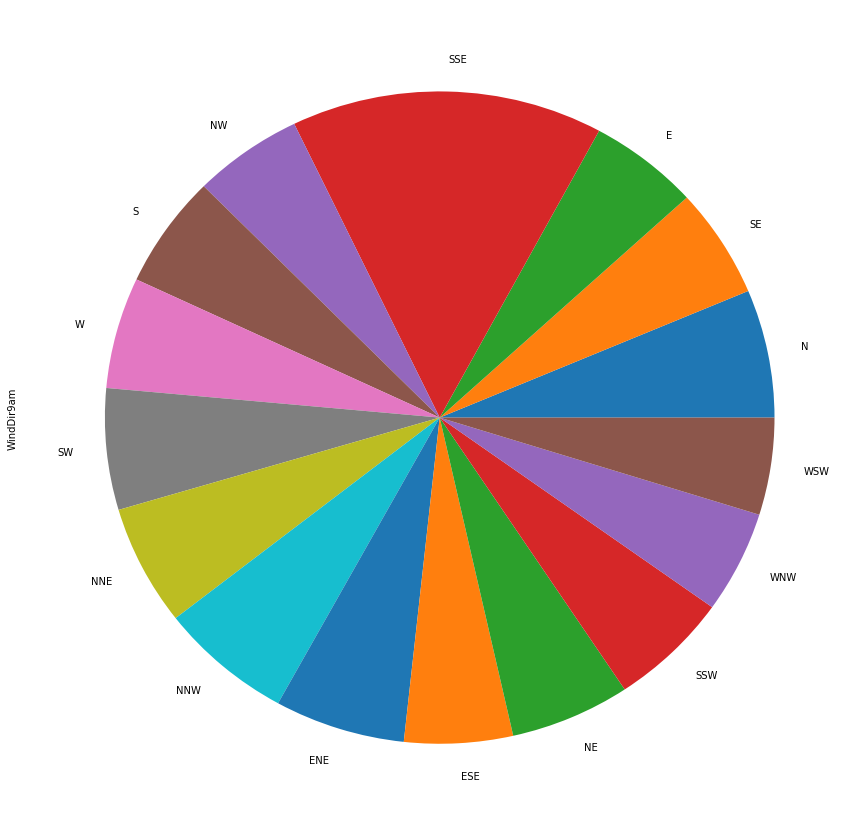

In [80]:
pieplot(data["WindDir9am"], labels=data["WindDir9am"].value_counts().index, figsize=(15, 15))

In [81]:
data["WindDir3pm"].value_counts()

SE     14441
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [82]:
data["WindDir3pm"].value_counts(normalize=True)

SE     0.101559
W      0.069701
S      0.067500
WSW    0.065608
SW     0.064574
SSE    0.064293
N      0.060952
WNW    0.060875
NW     0.059553
ESE    0.058948
E      0.058667
NE     0.057415
SSW    0.056332
NNW    0.054384
ENE    0.054321
NNE    0.045319
Name: WindDir3pm, dtype: float64

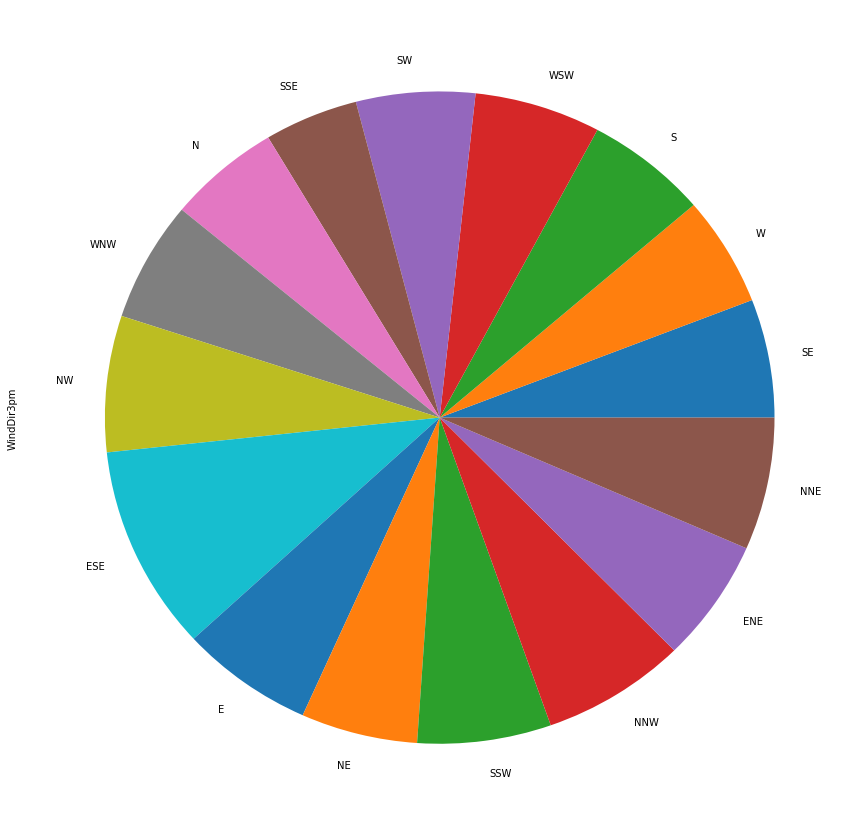

In [83]:
pieplot(data["WindDir3pm"], labels=data["WindDir3pm"].value_counts().index, figsize=(15, 15))

In [84]:
data["RainToday"].value_counts()

No     110738
Yes     31455
Name: RainToday, dtype: int64

In [85]:
data["RainToday"].value_counts(normalize=True)

No     0.778787
Yes    0.221213
Name: RainToday, dtype: float64

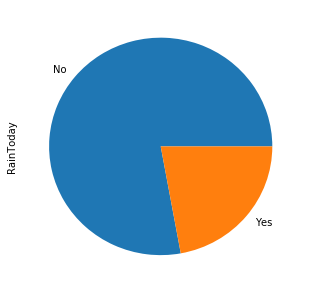

In [86]:
pieplot(data["RainToday"], labels=["No", "Yes"], figsize=(5, 5))

In [87]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


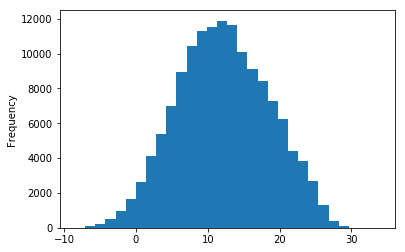

In [88]:
data["MinTemp"].plot.hist(bins=30)

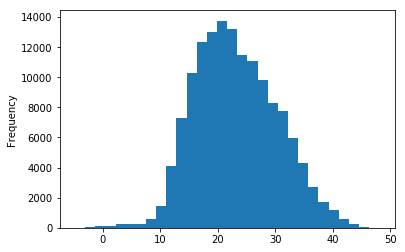

In [89]:
data["MaxTemp"].plot.hist(bins=30)

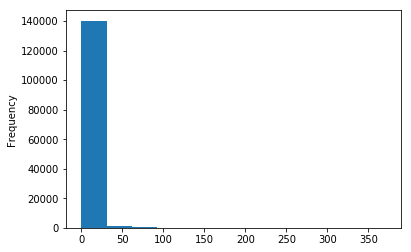

In [90]:
data["Rainfall"].plot.hist(bins=12)

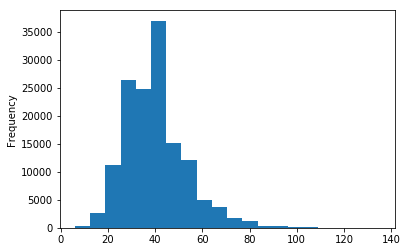

In [91]:
data["WindGustSpeed"].plot.hist(bins=20)

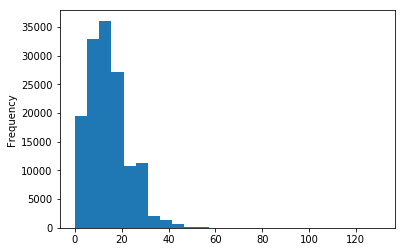

In [92]:
data["WindSpeed9am"].plot.hist(bins=25)

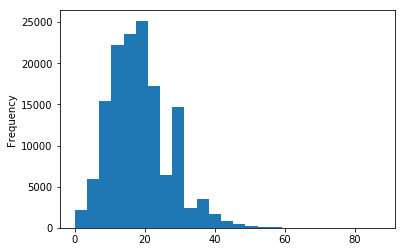

In [93]:
data["WindSpeed3pm"].plot.hist(bins=25)

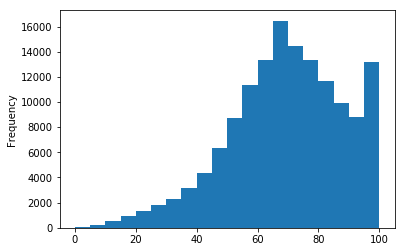

In [94]:
data["Humidity9am"].plot.hist(bins=20)

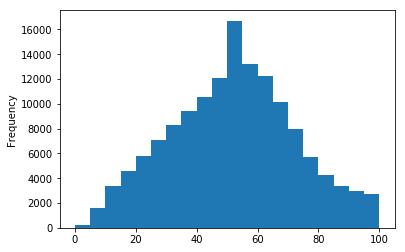

In [95]:
data["Humidity3pm"].plot.hist(bins=20)

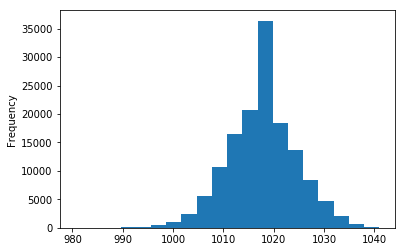

In [96]:
data["Pressure9am"].plot.hist(bins=20)

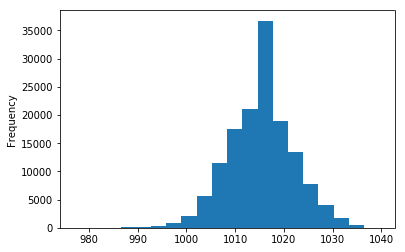

In [97]:
data["Pressure3pm"].plot.hist(bins=20)

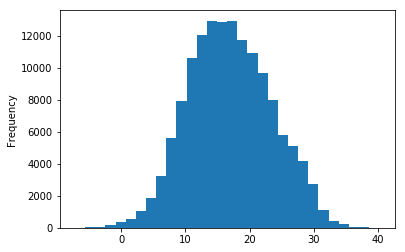

In [98]:
data["Temp9am"].plot.hist(bins=30)

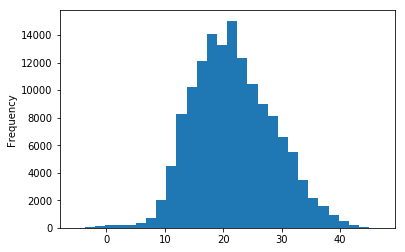

In [99]:
data["Temp3pm"].plot.hist(bins=30)

- Trasformiamo le colonne `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm` da variabili categoriche a variabili dummy con il metodo **One-Hot Encoding**

In [100]:
data = pd.get_dummies(data, columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])

- Trasformiamo le colonne `RainToday` e `RainTomorrow` da variabili categoriche a variabili numeriche nel seguente modo(**Label Encoding**):
    - 0: No
    - 1: Sì

In [101]:
rainMapping = {"No":0, "Yes":1}

data["RainToday"] = data["RainToday"].map(rainMapping)
data["RainTomorrow"] = data["RainTomorrow"].map(rainMapping)

- Il dataframe ora è il seguente

In [102]:
data.shape

(142193, 111)

In [103]:
pd.options.display.max_columns = 111

In [104]:
data

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,Location_Ballarat,Location_Bendigo,Location_Canberra,Location_MelbourneAirport,Location_MountGinini,Location_Sale,Location_SydneyAirport,Location_Tuggeranong,Location_WaggaWagga,Location_Williamtown,Location_Wollongong,Location_Adelaide,Location_Brisbane,Location_Cairns,Location_Dartmoor,Location_GoldCoast,Location_Melbourne,Location_Mildura,Location_MountGambier,Location_Nhil,Location_Portland,Location_Townsville,Location_Watsonia,Location_Albany,Location_Hobart,Location_Launceston,Location_Nuriootpa,Location_PearceRAAF,Location_Perth,Location_PerthAirport,Location_SalmonGums,Location_Walpole,Location_Witchcliffe,Location_Woomera,Location_AliceSprings,Location_Darwin,Location_Katherine,Location_Uluru,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.600000,44.0,20.000000,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2008-12-02,7.4,25.1,0.000000,44.0,4.000000,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2008-12-03,12.9,25.7,0.000000,46.0,19.000000,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2008-12-04,9.2,28.0,0.000000,24.0,11.000000,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-12-05,17.5,32.3,1.000000,41.0,7.000000,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2008-12-06,14.6,29.7,0.200000,56.0,19.000000,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2008-12-07,14.3,25.0,0.000000,50.0,20.000000,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2008-12-08,7.7,26.7,0.000000,35.0,6.000000,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

- Verifichiamo se sono presenti collinearità
- La collinearità si presenta quando due features sono correlate tra loro
- Per determinare quanto sono correlate due features utilizziamo il **coefficiente di correlazione di Pearson**

In [105]:
def findCollinearity(features):
    i = 0
    k = 0
    numFeatures = len(features)
    df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation'])
    for feature1 in features:
        i = i + 1
        for j in range(i, numFeatures):
            feature2 = features[j]
            feature1Values = data[feature1].values
            feature2Values = data[feature2].values
            correlation = np.mean((feature1Values - feature1Values.mean()) * (feature2Values - feature2Values.mean())) / \
                (feature1Values.std() * feature2Values.std())
            if abs(correlation) > 0.55:
                df.loc[k] = [feature1, feature2,  correlation]
                k = k + 1
    return df

In [106]:
findCollinearity(data.columns)

,Feature1,Feature2,Correlation
0,MinTemp,MaxTemp,0.733919
1,MinTemp,Temp9am,0.897999
2,MinTemp,Temp3pm,0.699828
3,MaxTemp,Temp9am,0.880087
4,MaxTemp,Temp3pm,0.969735
5,WindGustSpeed,WindSpeed9am,0.577864
6,WindGustSpeed,WindSpeed3pm,0.658377
7,Humidity9am,Humidity3pm,0.659852
8,Humidity3pm,Temp3pm,-0.555777
9,Pressure9am,Pressure3pm,0.959878


- Come possiamo vedere dal dataframe sono presenti alcune collinearità. Tuttavia dovremmo risolvere questo problema con la regolarizzazione

- Vediamo se è possibile separare linearmente le due classi con solo due features

In [107]:
def plotTwoFeatures(feature1, feature2):
    yesRain = data["RainTomorrow"] == 1
    noRain = data["RainTomorrow"] == 0
    
    plt.scatter(data[feature1][yesRain],data[feature2][yesRain], c="red",  edgecolor='white')
    plt.scatter(data[feature1][noRain],data[feature2][noRain], c="green",  edgecolor='white')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(["YesRain", "NoRain"])
    
    feature1Values = data[feature1].values
    feature2Values = data[feature2].values

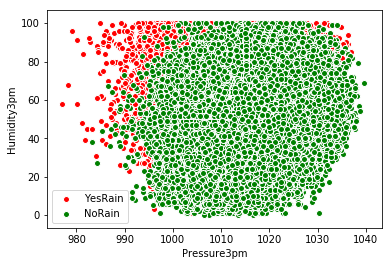

In [108]:
plotTwoFeatures("Pressure3pm", "Humidity3pm")

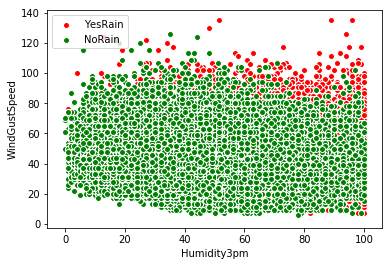

In [109]:
plotTwoFeatures("Humidity3pm", "WindGustSpeed")

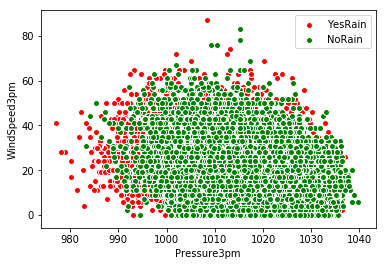

In [110]:
plotTwoFeatures("Pressure3pm", "WindSpeed3pm")

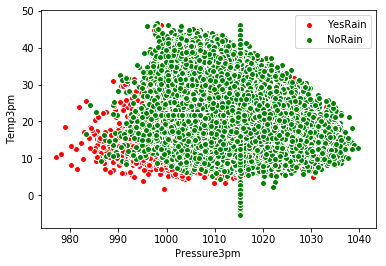

In [111]:
plotTwoFeatures("Pressure3pm", "Temp3pm")

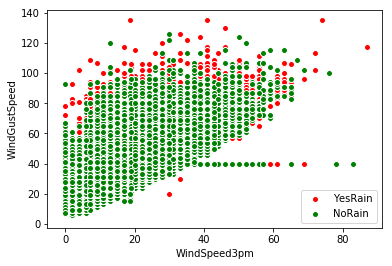

In [112]:
plotTwoFeatures("WindSpeed3pm", "WindGustSpeed")

- Con solo due features sembra che i dati non siano separabili linearmente

## Divisione Training e Test Set

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(["RainTomorrow"], axis=1),   
    data["RainTomorrow"],                  
    test_size=1/3, random_state=42   
)

In [114]:
len(X_train), len(X_test)

(94795, 47398)

## Perceptron

- Come metrica di valutazione utilizziamo la **F1-Measure** perchè le due classi della feature `RainTomorrow` sono sbilanciate

In [115]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [116]:
model = Pipeline([
    ("scaler", StandardScaler(), ),
    ("model",     Perceptron())
])
grid = {
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model__penalty": [None, "l2", "l1", "elasticnet"],
    "model__alpha": np.logspace(-3, 3, 7)
}
gs = GridSearchCV(model, grid, scoring="f1")
gs.fit(X_train, y_train);

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not Non

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not Non

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stocha

In [117]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.712927,0.016511,0.097943,0.001413,0.001,l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__alpha': 0.001, 'model__penalty': 'l1'...",0.530609,0.528121,0.519490,0.526073,0.004765,1,0.535977,0.529927,0.528471,0.531458,0.003250
0,0.286831,0.022190,0.040642,0.002053,0.001,None,None,"{'model__alpha': 0.001, 'model__penalty': None...",0.404759,0.551162,0.556037,0.503985,0.070192,2,0.397413,0.548146,0.560320,0.501960,0.074093
36,0.324481,0.018507,0.040977,0.005096,1,None,None,"{'model__alpha': 1.0, 'model__penalty': None, ...",0.404759,0.551162,0.556037,0.503985,0.070192,2,0.397413,0.548146,0.560320,0.501960,0.074093
24,0.271846,0.013433,0.036645,0.001699,0.1,None,None,"{'model__alpha': 0.1, 'model__penalty': None, ...",0.404759,0.551162,0.556037,0.503985,0.070192,2,0.397413,0.548146,0.560320,0.501960,0.074093
12,0.268513,0.005903,0.038312,0.002492,0.01,None,None,"{'model__alpha': 0.01, 'model__penalty': None,...",0.404759,0.551162,0.556037,0.503985,0.070192,2,0.397413,0.548146,0.560320,0.501960,0.074093


In [118]:
gs.score(X_train, y_train)

0.4946376946749977

In [119]:
gs.score(X_test, y_test)

0.48970444039781474

In [120]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron(penalty="l1", alpha=0.001))
])
model.fit(X_train, y_train)

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Perceptron(alpha=0.001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty='l1', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False))])

In [121]:
model.score(X_train, y_train)

0.7713381507463474

In [122]:
model.score(X_test, y_test)

0.7694206506603655

- Verifichiamo **precision** e **recall**

In [123]:
from sklearn.metrics import confusion_matrix

def computePrecisionAndRecall(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    
    print("La precision sulla classe 'NoRain' e': {}".format(cm[0, 0] / cm[:, 0].sum()))
    print("La precision sulla classe 'YesRain' e': {}".format(cm[1, 1] / cm[:, 1].sum()))
    print("La recall sulla classe 'NoRain' e': {}".format(cm[0, 0] / cm[0, :].sum()))
    print("La recall sulla classe 'YesRain' e': {}".format(cm[1, 1] / cm[1, :].sum()))

In [124]:
computePrecisionAndRecall(y_test, model.predict(X_test))

La precision sulla classe 'NoRain' e': 0.8545429666119321
La precision sulla classe 'YesRain' e': 0.4829618714312028
La recall sulla classe 'NoRain' e': 0.8476071554602459
La recall sulla classe 'YesRain' e': 0.49663793919878774


- Sia precision che recall per la classe `YesRain` sono molto scarse
- Vediamo se riusciamo a fare di meglio con un modello più complesso

## Regressione Logistica

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression())
])
grid = {
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model__penalty": ["l2", "l1"],
    "model__C": np.logspace(-3, 3, 7)
}
gs = GridSearchCV(model, grid, scoring="f1")
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))], 'model__penalty': ['l2', 'l1'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [127]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
28,23.837372,0.222513,0.099930,0.005094,10,l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 10.0, 'model__penalty': 'l1', 'sc...",0.589551,0.596937,0.586789,0.591093,0.004284,1,0.593048,0.591272,0.597491,0.593937,0.002616
37,2.840709,0.092310,0.098609,0.000943,1000,l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 1000.0, 'model__penalty': 'l2', '...",0.589619,0.596820,0.586789,0.591076,0.004223,2,0.593048,0.591330,0.597491,0.593957,0.002596
31,3.061921,0.194569,0.107265,0.009670,100,l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 100.0, 'model__penalty': 'l2', 's...",0.589619,0.596820,0.586789,0.591076,0.004223,2,0.593048,0.591330,0.597491,0.593957,0.002596
25,2.917670,0.167320,0.101602,0.003394,10,l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 10.0, 'model__penalty': 'l2', 'sc...",0.589570,0.596820,0.586789,0.591060,0.004228,4,0.593048,0.591272,0.597550,0.593957,0.002642
35,13.933360,0.257577,0.092948,0.004543,100,l1,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 100.0, 'model__penalty': 'l1', 's...",0.589149,0.597037,0.586937,0.591041,0.004335,5,0.592819,0.591590,0.597533,0.593981,0.002561


In [128]:
gs.score(X_train, y_train)

0.5938614081996435

In [129]:
gs.score(X_test, y_test)

0.5862301721228484

In [130]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l2", C=1000))
])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [131]:
model.score(X_train, y_train)

0.8461522232185242

In [132]:
model.score(X_test, y_test)

0.8448246761466729

In [133]:
computePrecisionAndRecall(y_test, model.predict(X_test))

La precision sulla classe 'NoRain' e': 0.8669172183782169
La precision sulla classe 'YesRain' e': 0.7218836565096953
La recall sulla classe 'NoRain' e': 0.9454925486576726
La recall sulla classe 'YesRain' e': 0.49360734918079363


- Ora la precision sulla classe `YesRain` è decisamente migliorata, mentre la recall è rimasta più o meno la stessa 

- Proviamo ad aumentare il peso degli errori sulla classe `YesRain`

In [134]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(class_weight={1: 10}))
])
grid = {
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model__penalty": ["l2", "l1"],
    "model__C": np.logspace(-3, 3, 7),
    "model__class_weight": [{1: w} for w in [2, 3, 4, 5]]
}
gs = GridSearchCV(model, grid, scoring="f1")
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight={1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))], 'model__penalty': ['l2', 'l1'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'model__class_weight': [{1: 2}, {1: 3}, {1: 4}, {1: 5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [135]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
52,5.874984,0.202225,0.097266,0.002631,0.1,{1: 2},l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.1, 'model__class_weight': {1: 2...",0.635157,0.640174,0.625111,0.633481,0.006263,1,0.633018,0.630866,0.637740,0.633875,0.002871
77,21.067285,0.648324,0.092607,0.002859,1,{1: 2},l1,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 1.0, 'model__class_weight': {1: 2...",0.635387,0.639907,0.625060,0.633452,0.006214,2,0.632571,0.631309,0.637648,0.633843,0.002739
98,1.581762,0.046680,0.099275,0.004640,10,{1: 2},l2,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 10.0, 'model__class_weight': {1: ...",0.635244,0.640196,0.624615,0.633352,0.006500,3,0.633190,0.631896,0.637839,0.634308,0.002552
49,3.092897,0.273634,0.102608,0.004711,0.1,{1: 2},l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.1, 'model__class_weight': {1: 2...",0.635021,0.640109,0.624795,0.633308,0.006368,4,0.633165,0.631575,0.637799,0.634180,0.002640
125,21.204200,0.572974,0.095611,0.004187,100,{1: 2},l1,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 100.0, 'model__class_weight': {1:...",0.635307,0.639973,0.624607,0.633295,0.006432,5,0.632859,0.631611,0.637839,0.634103,0.002691


In [136]:
gs.score(X_train, y_train)

0.6339350838803792

In [137]:
gs.score(X_test, y_test)

0.6255430060816682

In [138]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.1, class_weight={1: 2}))
])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [139]:
model.score(X_train, y_train)

0.8305817817395432

In [140]:
model.score(X_test, y_test)

0.8272078990674712

In [141]:
computePrecisionAndRecall(y_test, model.predict(X_test))

La precision sulla classe 'NoRain' e': 0.8969434976584365
La precision sulla classe 'YesRain' e': 0.6047210679869154
La recall sulla classe 'NoRain' e': 0.8786340562990309
La recall sulla classe 'YesRain' e': 0.647788616346245


- Aumentando il peso degli errori sulla classe `YesRain` abbiamo bilanciato la precision e la recall

## FEATURES RILEVANTI

- Prima avevamo notato che sul nostro dataset ci sono alcune variabili che dipendono da altre(**collinearità**)

In [142]:
findCollinearity(data.columns)

,Feature1,Feature2,Correlation
0,MinTemp,MaxTemp,0.733919
1,MinTemp,Temp9am,0.897999
2,MinTemp,Temp3pm,0.699828
3,MaxTemp,Temp9am,0.880087
4,MaxTemp,Temp3pm,0.969735
5,WindGustSpeed,WindSpeed9am,0.577864
6,WindGustSpeed,WindSpeed3pm,0.658377
7,Humidity9am,Humidity3pm,0.659852
8,Humidity3pm,Temp3pm,-0.555777
9,Pressure9am,Pressure3pm,0.959878


- Vediamo se riusciamo a risolvere questo problema utilizzando la **regolarizzazione L1**

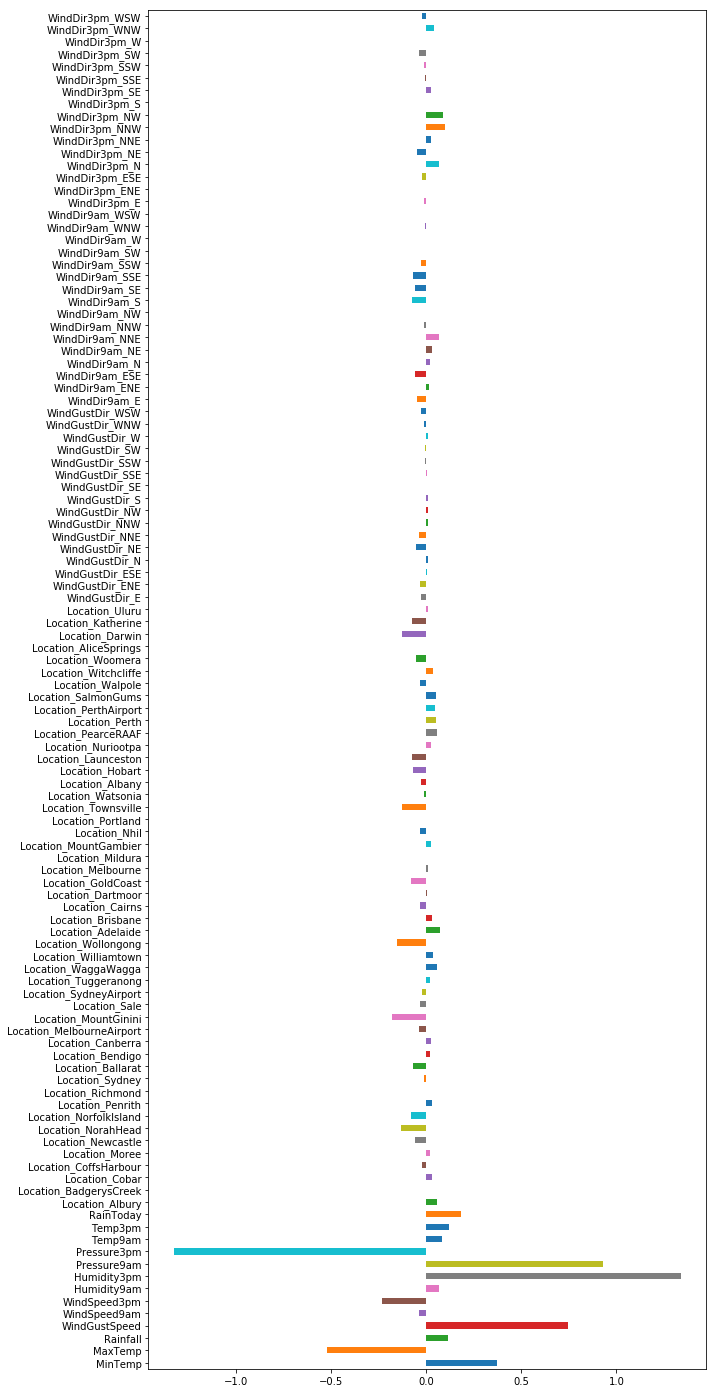

In [143]:
pd.Series(model.named_steps["model"].coef_[0], index=X_train.columns).plot.barh(figsize=(10,25))
plt.show()

- Il grafico ci mostra che più una feature è importante e più è lunga la sua barra

In [144]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.001))
])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [145]:
model.score(X_train, y_train)

0.8407827417057862

In [146]:
model.score(X_test, y_test)

0.8392126250052745

In [147]:
computePrecisionAndRecall(y_test, model.predict(X_test))

La precision sulla classe 'NoRain' e': 0.8573105708555496
La precision sulla classe 'YesRain' e': 0.725583538083538
La recall sulla classe 'NoRain' e': 0.9514916257227395
La recall sulla classe 'YesRain' e': 0.4474855573444455


In [148]:
model.named_steps["model"].coef_

array([[ 0.        ,  0.        ,  0.05627731,  0.41514762,  0.        ,
        -0.05985634,  0.00235008,  1.1325517 ,  0.        , -0.36435952,
         0.        ,  0.        ,  0.1853285 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.01945578,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.04567863,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.0356948 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.01755784,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00587524,  0.        ,  0.        ,  0. 

In [149]:
lessImportanceFeatures = X_train.columns[model.named_steps["model"].coef_[0] == 0]

In [150]:
lessImportanceFeatures

Index(['MinTemp', 'MaxTemp', 'WindSpeed9am', 'Pressure9am', 'Temp9am',
       'Temp3pm', 'Location_Albury', 'Location_BadgerysCreek',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Moree',
       'Location_Newcastle', 'Location_NorfolkIsland', 'Location_Penrith',
       'Location_Richmond', 'Location_Sydney', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Canberra', 'Location_MelbourneAirport',
       'Location_Sale', 'Location_SydneyAirport', 'Location_Tuggeranong',
       'Location_WaggaWagga', 'Location_Williamtown', 'Location_Adelaide',
       'Location_Brisbane', 'Location_Cairns', 'Location_Dartmoor',
       'Location_GoldCoast', 'Location_Melbourne', 'Location_Mildura',
       'Location_MountGambier', 'Location_Nhil', 'Location_Portland',
       'Location_Watsonia', 'Location_Albany', 'Location_Hobart',
       'Location_Launceston', 'Location_Nuriootpa', 'Location_PearceRAAF',
       'Location_Perth', 'Location_PerthAirport', 'Location_SalmonGums',
      

In [151]:
X_train2 = X_train.drop(columns=lessImportanceFeatures)
X_test2 = X_test.drop(columns=lessImportanceFeatures)

In [152]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.1, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [153]:
model.score(X_train2, y_train)

0.8260878738330081

In [154]:
model.score(X_test2, y_test)

0.8232414869825732

In [155]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.8925980081110161
La precision sulla classe 'YesRain' e': 0.5977939198278182
La recall sulla classe 'NoRain' e': 0.8782540242677597
La recall sulla classe 'YesRain' e': 0.6313097831234018


In [156]:
findCollinearity(X_test2.columns)

,Feature1,Feature2,Correlation
0,WindGustSpeed,WindSpeed3pm,0.658377
1,Humidity9am,Humidity3pm,0.659852


- Ancora è presente qualche collinearità. Proviamo ad aumentare il peso della regolarizzazione

In [157]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.0006))
])

In [158]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.0006, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [159]:
model.score(X_train, y_train)

0.8387362202647819

In [160]:
model.score(X_test, y_test)

0.8365120891176843

In [161]:
computePrecisionAndRecall(y_test, model.predict(X_test))

La precision sulla classe 'NoRain' e': 0.8531196892449624
La precision sulla classe 'YesRain' e': 0.7263208762886598
La recall sulla classe 'NoRain' e': 0.9538803984907299
La recall sulla classe 'YesRain' e': 0.4270290747229851


In [162]:
model.named_steps["model"].coef_

array([[ 0.        ,  0.        ,  0.03587107,  0.3210483 ,  0.        ,
         0.        ,  0.        ,  1.01934012,  0.        , -0.32163357,
         0.        ,  0.        ,  0.17574814,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [163]:
lessImportanceFeatures = X_train.columns[model.named_steps["model"].coef_[0] == 0]

In [164]:
lessImportanceFeatures

Index(['MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Pressure9am', 'Temp9am', 'Temp3pm', 'Location_Albury',
       'Location_BadgerysCreek',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=105)

In [165]:
X_train2 = X_train.drop(columns=lessImportanceFeatures)
X_test2 = X_test.drop(columns=lessImportanceFeatures)

In [166]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.1, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [167]:
model.score(X_train2, y_train)

0.8203280763753362

In [168]:
model.score(X_test2, y_test)

0.818431157432803

In [169]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.8901633454022829
La precision sulla classe 'YesRain' e': 0.5870553623963627
La recall sulla classe 'NoRain' e': 0.874263687939412
La recall sulla classe 'YesRain' e': 0.6236386021403542


In [170]:
findCollinearity(X_train2.columns)

,Feature1,Feature2,Correlation


- L'accuratezza, la precision e la recall sono molto simili al modello che fa uso di tutte le features
- Questo modello però è molto più semplice perchè fa uso di soltanto 5 features

In [171]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(class_weight={1: 10}))
])
grid = {
    "scaler": [None, StandardScaler(), MinMaxScaler()],
    "model__penalty": ["l2", "l1"],
    "model__C": np.logspace(-3, 3, 7),
    "model__class_weight": [{1: w} for w in [1, 2, 3, 4, 5]]
}
gs = GridSearchCV(model, grid, scoring="f1")
gs.fit(X_train2, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=1.0, class_weight={1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1))], 'model__penalty': ['l2', 'l1'], 'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'model__class_weight': [{1: 1}, {1: 2}, {1: 3}, {1: 4}, {1: 5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [172]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.085284,0.001247,0.009329,4.700779e-04,0.001,{1: 2},l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.001, 'model__class_weight': {1:...",0.616687,0.615218,0.604632,0.612179,0.005370,1,0.609616,0.611302,0.615813,0.612244,0.002616
10,0.080287,0.000471,0.008995,3.371748e-07,0.001,{1: 2},l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.001, 'model__class_weight': {1:...",0.616328,0.614811,0.605236,0.612125,0.004910,2,0.609809,0.611096,0.615212,0.612039,0.002304
40,0.080621,0.003769,0.010660,3.089354e-03,0.01,{1: 2},l1,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.01, 'model__class_weight': {1: ...",0.615880,0.614106,0.605306,0.611764,0.004623,3,0.609198,0.610481,0.615090,0.611590,0.002530
37,0.087283,0.002624,0.008995,6.257699e-07,0.01,{1: 2},l2,"StandardScaler(copy=True, with_mean=True, with...","{'model__C': 0.01, 'model__class_weight': {1: ...",0.615712,0.613802,0.605265,0.611593,0.004542,4,0.609364,0.610347,0.614596,0.611436,0.002271
98,0.096612,0.005903,0.008661,4.711456e-04,1,{1: 2},l2,"MinMaxScaler(copy=True, feature_range=(0, 1))","{'model__C': 1.0, 'model__class_weight': {1: 2...",0.615881,0.613801,0.605094,0.611592,0.004673,5,0.609058,0.610840,0.614722,0.611540,0.002365


In [173]:
gs.score(X_train2, y_train)

0.6122856818439877

In [174]:
gs.score(X_test2, y_test)

0.6048825005703856

In [175]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l2", C=0.001, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.001, class_weight={1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [176]:
model.score(X_train2, y_train)

0.8198955641120312

In [177]:
model.score(X_test2, y_test)

0.8173129667918477

In [178]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.8909328006214972
La precision sulla classe 'YesRain' e': 0.5836562169778091
La recall sulla classe 'NoRain' e': 0.8716577540106952
La recall sulla classe 'YesRain' e': 0.6277109574770338


## MODELLI MIGLIORI

In [179]:
import math

def computeConfidenceInterval(istanceNumber, accuracy, z=1.96):
    firstPartNumerator = 2 * istanceNumber * accuracy + z**2
    secondPartNumerator = z * math.sqrt(z**2 + 4 * istanceNumber * accuracy - 4 * istanceNumber * accuracy**2)
    denominator = 2 * (istanceNumber + z**2)
    p1 = (firstPartNumerator - secondPartNumerator) / denominator
    p2 = (firstPartNumerator + secondPartNumerator) / denominator
    print("L'intervallo di confidenza è compreso tra {} e {}".format(p1, p2))

- I tre modelli migliori sono quelli che hanno ottenuto la f1-measure più elevata con soltanto 5 features:

- **primo modello**

In [180]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l2", C=0.001, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.001, class_weight={1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [181]:
model.score(X_train2, y_train)

0.8198955641120312

In [182]:
model.score(X_test2, y_test)

0.8173129667918477

In [183]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.8909328006214972
La precision sulla classe 'YesRain' e': 0.5836562169778091
La recall sulla classe 'NoRain' e': 0.8716577540106952
La recall sulla classe 'YesRain' e': 0.6277109574770338


In [184]:
 computeConfidenceInterval(y_test.shape[0], model.score(X_test2, y_test))

L'intervallo di confidenza è compreso tra 0.8138085394202977 e 0.8207659620058241


- **secondo modello**

In [185]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.001, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.001, class_weight={1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [186]:
model.score(X_train2, y_train)

0.8198744659528456

In [187]:
model.score(X_test2, y_test)

0.8172707709186041

In [188]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.8903202570921985
La precision sulla classe 'YesRain' e': 0.5839674393912582
La recall sulla classe 'NoRain' e': 0.872363527783056
La recall sulla classe 'YesRain' e': 0.625059191211289


In [189]:
computeConfidenceInterval(y_test.shape[0], model.score(X_test2, y_test))

L'intervallo di confidenza è compreso tra 0.8137660350973218 e 0.8207240814216954


- **terzo modello**

In [190]:
model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.01, class_weight={1: 2}))
])
model.fit(X_train2, y_train)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.01, class_weight={1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [191]:
model.score(X_train2, y_train)

0.8203491745345218

In [192]:
model.score(X_test2, y_test)

0.8183889615595594

In [193]:
computePrecisionAndRecall(y_test, model.predict(X_test2))

La precision sulla classe 'NoRain' e': 0.890221988776159
La precision sulla classe 'YesRain' e': 0.5869042316258352
La recall sulla classe 'NoRain' e': 0.874127962213958
La recall sulla classe 'YesRain' e': 0.6239227199545412


In [194]:
computeConfidenceInterval(y_test.shape[0], model.score(X_test2, y_test))

L'intervallo di confidenza è compreso tra 0.814892423170699 e 0.8218338933865885


## SCELTA DEL MODELLO MIGLIORE

In [195]:
def compareTwoModel(istanceNumber, e1, e2, z=1.96):
    d = abs(e2 - e1)
    variance = (e1 * (1 - e1) / istanceNumber) + (e2 * (1 - e2) / istanceNumber)
    commonPart = z * math.sqrt(variance)
    dt1 = d - commonPart
    dt2 = d + commonPart
    print("La differenza è compresa fra {} e {}".format(dt1, dt2))
    print("La differenza fra i due modelli non è statisticamente significativa poichè l'intervallo contiene lo 0: la differenza è solo frutta del caso, ossia \
ripetendo numerose volte gli esperimenti potremmo ad esempio ottenere risultati opposti") if (dt1 <=0 and dt2 >= 0) \
        else print("La differenza fra i due modelli è statisticamente significativa")

- Differenza tra il primo e secondo modello

In [196]:
compareTwoModel(y_test.shape[0], 1 - 0.8173129667918477, 1 - 0.817291868855226)

La differenza è compresa fra -0.0048987179723922955 e 0.004940913845635796
La differenza fra i due modelli non è statisticamente significativa poichè l'intervallo contiene lo 0: la differenza è solo frutta del caso, ossia ripetendo numerose volte gli esperimenti potremmo ad esempio ottenere risultati opposti


- Differenza tra il primo e terzo modello

In [197]:
compareTwoModel(y_test.shape[0], 1 - 0.8173129667918477, 1 - 0.8183889615595594)

La differenza è compresa fra -0.0038380732375033364 e 0.0059900627729267296
La differenza fra i due modelli non è statisticamente significativa poichè l'intervallo contiene lo 0: la differenza è solo frutta del caso, ossia ripetendo numerose volte gli esperimenti potremmo ad esempio ottenere risultati opposti


- Differenza tra secondo e terzo modello

In [198]:
compareTwoModel(y_test.shape[0], 1 - 0.817291868855226, 1 - 0.8183889615595594)

La differenza è compresa fra -0.0038170857136882175 e 0.006011271122355111
La differenza fra i due modelli non è statisticamente significativa poichè l'intervallo contiene lo 0: la differenza è solo frutta del caso, ossia ripetendo numerose volte gli esperimenti potremmo ad esempio ottenere risultati opposti


- Non esiste un modello migliore
- Il modello scelto da me è il terzo

In [199]:
x = np.concatenate((X_train2, X_test2))
y = np.concatenate((y_train, y_test))

model = Pipeline([
    ("scler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.01, class_weight={1: 2}))
])
model.fit(x, y)

Pipeline(memory=None,
     steps=[('scler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LogisticRegression(C=0.01, class_weight={1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

## ANALISI DEI PARAMETRI APPRESI

In [200]:
pd.DataFrame(model.named_steps["model"].coef_.reshape(5, 1),   columns=['coefficiente'],   index=X_train2.columns) 

,coefficiente
Rainfall,0.102181
WindGustSpeed,0.461829
Humidity3pm,1.266680
Pressure3pm,-0.474749
RainToday,0.201978


- I parametri `WindGustSpeed`, `Humidity3pm` e `Pressure3pm` sono più importanti dei parametri `Rainfall` e `RainToday` perchè hanno un coefficiente più alto e quindi influenzano di più
- In particolare il modello ci fa capire che:
    - valori più alti per le variabili `Rainfall`, `WindGustSpeed`, `Humidity3pm` e `RainToday` riducono la probabilità che il giorno dopo piova
    - valori più alti per la variabile `Pressure3pm` aumentano la probabilità che il giorno dopo piova

## APPLICAZIONE WEB

In [201]:
%%writefile predict.py
from flask import Flask, request, render_template

app = Flask(__name__)

Overwriting predict.py


In [202]:
import pickle
with open("model.bin", "wb") as f:
    pickle.dump(model, f)
del model

In [203]:
import os
if not os.path.isdir("templates"):
    os.mkdir("templates")

In [204]:
%%writefile templates/predict.html
<!DOCTYPE html>
<head>
 <title>Predizione pioggia in Australia</title>
</head>
<body>
 <h2>Pioggia in Australia</h2>
 <p>Predizione: <b>{{ resp }}</b></p>
 <form method="GET" action="{{ url_for("home") }}">
    <p><button type="submit">Nuova previsione</button></p>
 </form>
</body>
</html>

Overwriting templates/predict.html


In [205]:
%%writefile templates/index.html
<!DOCTYPE html>
<head>
 <title>Predizione pioggia in Australia</title>
</head>
<body>
 <h2>Pioggia in Australia</h2>
 <form method="GET" action="{{ url_for("predict") }}">
  <p>Quantità di pioggia registrata in mm: <input required type="number" min="0" step="any" name="RAINFALL"></p>
  <p>Velocità (km/h) della raffica di vento più forte nelle 24 ore: <input required type="number" min="0" step="any" name="WIND_GUST_SPEED"></p>  
  <p>Percentuale di umidità alle 15:00: <input required  type="number" min="0" step="any" name="HUMIDITY_3PM"></p>   
  <p>Pressione atmosferica (hpa) ridotta a livello medio del mare alle 15:00: <input required  type="number" min="0" step="any" name="PRESSURE_3PM"></p>
  <p>Prepiciptazione (mm) fino alle 9:00 supera 1mm(0=no, 1=sì): <input required type="number" min="0" max="1" step="any" name="RAIN_TODAY"></p>
  <p><button type="submit">Conferma</button></p>
 </form>
</body>
</html>

Overwriting templates/index.html
